In [4]:
#import all libraries including visualization
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# Create path to project folder
path = r'C:\Users\tatal\06-2023 Instacart Basket Analysis'

In [6]:
#IMPORT latest order_product file 
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_aggregated_4-8.pkl'))

In [4]:
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_last_order,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy days,average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy days,average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy days,most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy days,average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy days,most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


In [5]:
ords_prods_merge.shape

(32404859, 24)

<Axes: >

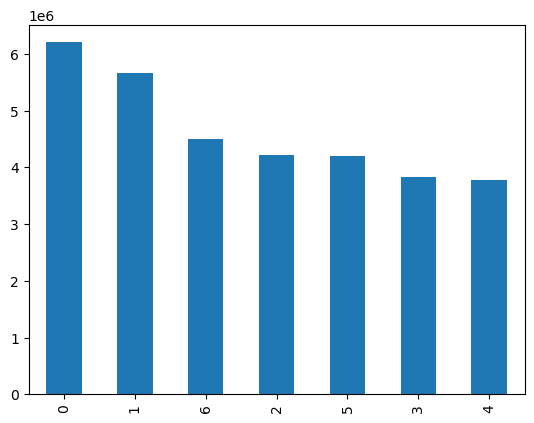

In [6]:
## Create bar chart for orders of the week
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: >

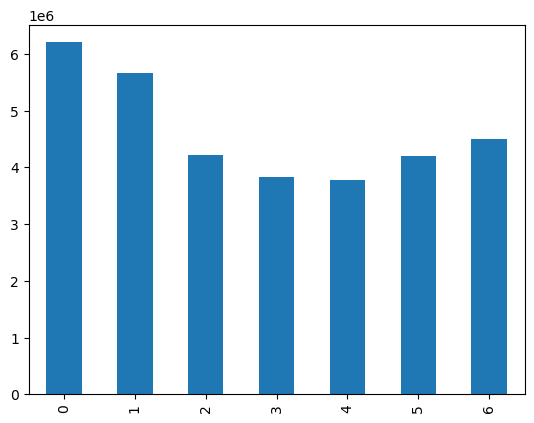

In [7]:
#by standard it shows the highest value first. We can change it by adding index
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: >

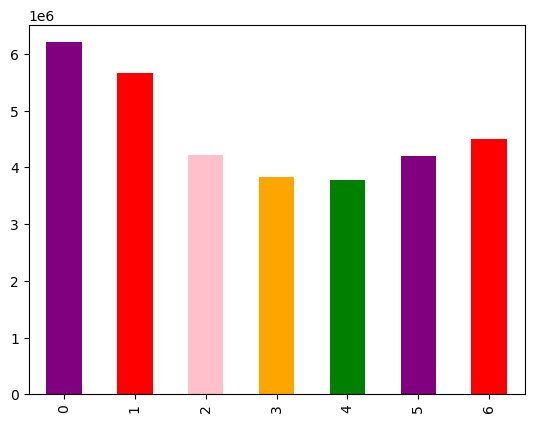

In [8]:
## add colors
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['purple', 'red', 'pink', 'orange', 'green'])

## Export chart

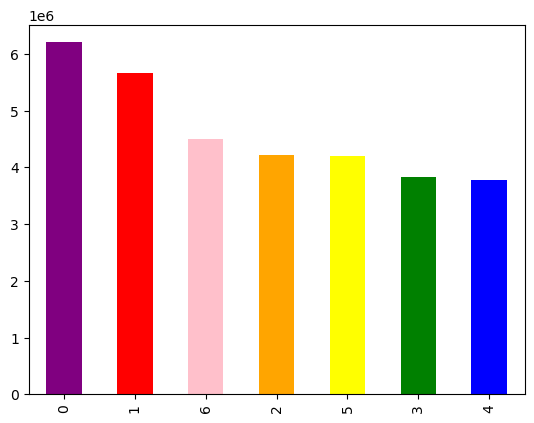

In [10]:
#fist save the chart in jupyter memory by createing "bar" object
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

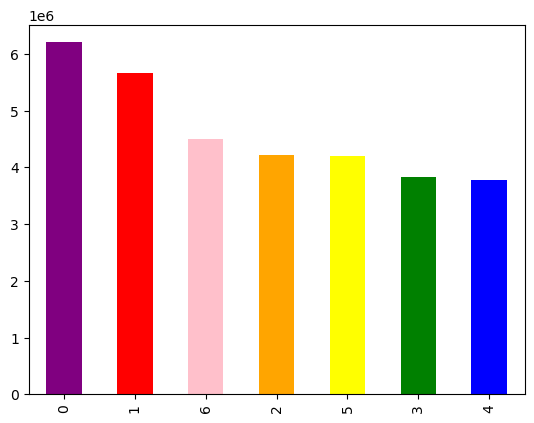

In [11]:
## call bar figrue anytime
bar.figure

In [12]:
#Export bar figure
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

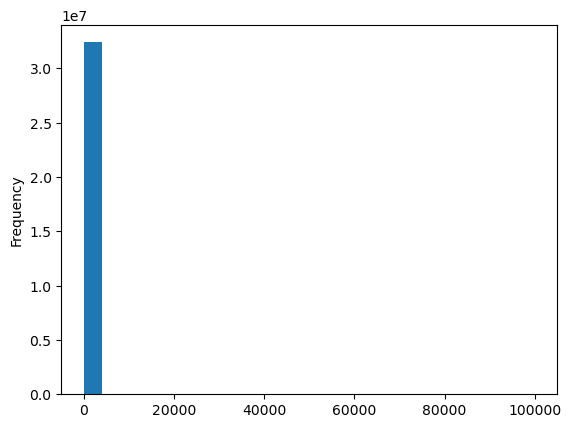

In [13]:
#histogram for pricing
ords_prods_merge['prices'].plot.hist(bins = 25)

In [16]:
#Check the price column to identify problems
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [17]:
ords_prods_merge['prices'].mean()

11.980225638383454

In [18]:
ords_prods_merge['prices'].median()

7.4

In [19]:
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

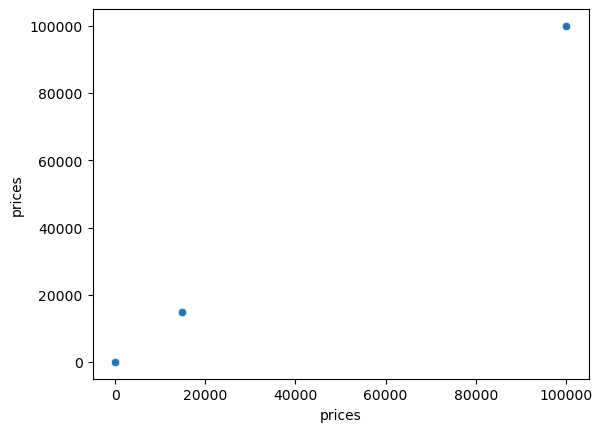

In [22]:
#scatterplot to identify outliers
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [7]:
#check for prices over 100
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_last_order,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy days,most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy days,most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy days,average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiest days,average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Least busy days,most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Least busy days,average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [8]:
#change the price higher than 100 to null
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [9]:
#find the max price
ords_prods_merge['prices'].max()

25.0

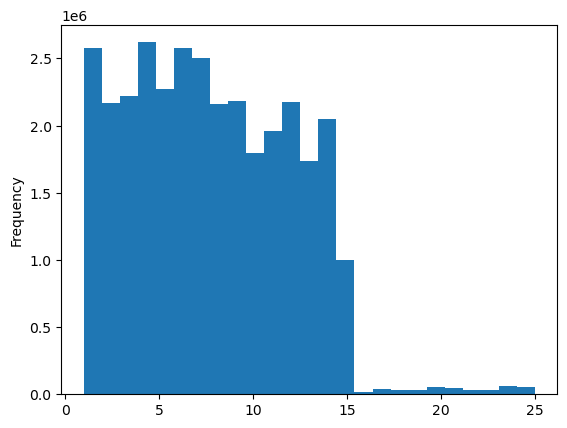

In [11]:
#histogram for pricing after cleaning
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

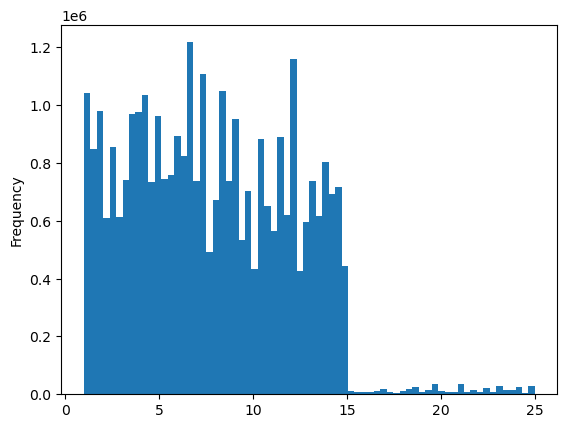

In [12]:
#histogram for pricing after cleaning with more bins
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [13]:
#Export histogram figure
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

## Creating Line Charts

In [14]:
#create a sample of the data - 70/30 sample
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [15]:
# assing the dev list to the database to create sample ## large sample
big = ords_prods_merge[dev]

In [16]:
##small sample
small = ords_prods_merge[~dev]

#chek if results match. number of rows of big + small hould be equal to original

In [17]:
#check lengh original
len(ords_prods_merge)

32404859

In [19]:
#check the samples
len(big) + len(small)

32404859

In [21]:
##reduce the sample to only the column necessary for the chart
df_2 = small[['orders_day_of_week','prices']]

In [22]:
df_2.head()

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0


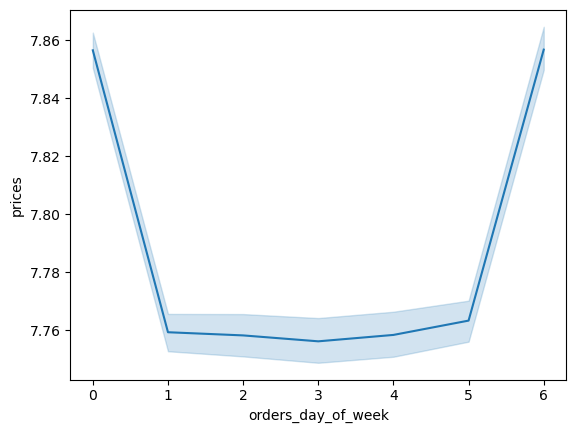

In [23]:
#create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [24]:
#Export line figure
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price.png'))

In [26]:
#export the merge data as pickle with cleanup pricing
ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_aggregated_4-9.pkl'))

In [ ]:
df_first_id =  ords_prods_merge[ords_prods_merge['department_id']==19]